In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

US = pd.read_csv("Input/US_Terms.csv")
AUS = pd.read_csv("Input/AUS_Terms.csv")
JAP = pd.read_csv("Input/JAP_Terms.csv")
ENG = pd.read_csv("Input/ENG_Terms.csv")

All_Terms_df = pd.DataFrame(US)
All_Terms_df["Country"] = "United States"
AUS_Terms_df = pd.DataFrame(AUS)
AUS_Terms_df["Country"] = "Australia"
JAP_Terms_df = pd.DataFrame(JAP)
JAP_Terms_df["Country"] = "Japan"
ENG_Terms_df = pd.DataFrame(ENG)
ENG_Terms_df["Country"] = "England"

All_Terms_df = All_Terms_df.append(AUS_Terms_df, ignore_index=True)
All_Terms_df = All_Terms_df.append(JAP_Terms_df, ignore_index=True)
All_Terms_df = All_Terms_df.append(ENG_Terms_df, ignore_index=True)

All_Terms_df.head()



,Month,Search Term,Percentage,Country
0,05-May,Anderson Cooper,"+4,700%",United States
1,05-May,Governor,+40%,United States
2,03-Mar,Delegate,+950%,United States
3,03-Mar,Real Madrid C.F.,+850%,United States
4,03-Mar,FC Barcelona,+550%,United States


After viewing the data, I noticed there were searches corresponding to the month.  I decided to remove them so the data was more realistic

In [2]:
month_list = ("January","February","March", "April","May","June","July","August","September","October","November","December")
All_No_Month = All_Terms_df[~All_Terms_df["Search Term"].isin(month_list)]

Summary of terms without the month grouping

In [54]:
Grouped_Terms = All_No_Month.groupby(["Search Term"])
Term_Count = pd.DataFrame(Grouped_Terms["Country"].count())
Term_Count = Term_Count[Term_Count["Country"] > 2]
Term_Count.sort_values("Country", ascending=False)
# Lottery
# Sports league


,Country
Search Term,
Sports league,9
Result,8
Premier League,8
Lottery,8
Arsenal F.C.,6
Moon,5
Share price,5
Stock,5
Clinic,5


Saw that without the Month grouping, there were terms that had a count over 4.  I wanted to see what it meant, so queried one term to see the raw data.  Turns out that there were multiple searches for the same term over different months

In [59]:
Lottery = All_Terms_df[All_Terms_df["Search Term"] == "Moon"]
Lottery

,Month,Search Term,Percentage,Country
104,10-Oct,Moon,+40%,United States
215,10-Oct,Moon,+70%,Australia
232,09-Sep,Moon,+60%,Australia
268,08-Aug,Moon,+60%,Australia
420,10-Oct,Moon,+350%,Japan


([<matplotlib.patches.Wedge at 0x2835343a4e0>,
 [Text(-1.0958141679009201, -0.09587131702242374, 'Australia'),
  Text(1.1444603408978722, -0.3608469594051286, 'England'),
  Text(-0.5079234745585374, 0.9757119164960439, 'United States')])

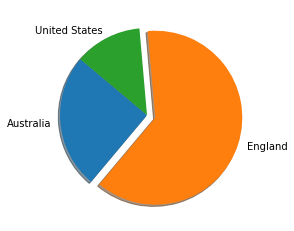

In [52]:
One_Term = All_Terms_df[All_Terms_df["Search Term"] == "Lottery"]
One_Term_Month = One_Term.groupby(["Search Term","Country"]).count()
One_Term_Month = One_Term_Month.reset_index(drop=False)
explode = (0, 0.1, 0)
plt.pie(One_Term_Month["Month"], explode = explode, labels=One_Term_Month["Country"], shadow=True, startangle=140)


Summary of terms that more than 2 countries searched for in the same month

In [13]:
Grouped_Month = All_No_Month.groupby(["Month", "Search Term"])
Summary_df = pd.DataFrame(Grouped_Month["Country"].count())
Summary_df = Summary_df[Summary_df["Country"] > 2]
Summary_df

Country
Month  Search Term              
01-Jan New Year's Day          4
02-Feb Lottery                 3
       Premier League          3
       Sports league           3
04-Apr April Fools' Day        3
06-Jun Google Classroom        3
       Insurance               3
       Share                   3
       Share price             3
       Stock                   3
       Telephone               3
       Telephone number        3
08-Aug TikTok                  4
10-Oct Chrissy Teigen          3
       Moon                    3
11-Nov Christmas Day           3
12-Dec Holiday                 3

In [6]:
Breakout_df = All_No_Month[All_No_Month["Percentage"] == "Breakout"]
Breakout_df

,Month,Search Term,Percentage,Country
13,02-Feb,Greensboro sit-ins,Breakout,United States
14,02-Feb,Sit-in,Breakout,United States
62,12-Dec,Elliot Page,Breakout,United States
138,04-Apr,Jean Macnamara,Breakout,United States
369,02-Feb,Mary Somerville,Breakout,Australia
394,12-Dec,Yû Inaba,Breakout,Japan
395,12-Dec,Kentarō Kobayashi,Breakout,Japan
416,10-Oct,Satomi Ishihara,Breakout,Japan
417,10-Oct,Mayuko Iwasa,Breakout,Japan
462,07-Jul,No Min-woo,Breakout,Japan


In [7]:
No_Breakout_df = All_No_Month[All_No_Month["Percentage"] != "Breakout"]
No_Breakout_df["Percentage"] = No_Breakout_df["Percentage"].str.replace('+','')
No_Breakout_df["Percentage"] = No_Breakout_df["Percentage"].str.replace('%','')
No_Breakout_df["Percentage"] = No_Breakout_df["Percentage"].str.replace(',', '').astype(float)
No_Breakout_df["Percentage"] = pd.to_numeric(No_Breakout_df["Percentage"])
No_Breakout_df.sort_values("Percentage", ascending=False).head()

C:\Users\blbst\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\blbst\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\blbst\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Month,Search Term,Percentage,Country
0,05-May,Anderson Cooper,4700.0,United States
760,10-Oct,Liverpool 0–2 Arsenal,4700.0,England
15,02-Feb,Greensboro,4650.0,United States
210,10-Oct,Chrissy Teigen,3750.0,Australia
434,09-Sep,Yukari Oshima,3700.0,Japan


In [8]:
US_NoBreakout = No_Breakout_df[No_Breakout_df["Country"] == 'United States'].sort_values("Percentage", ascending=False).head(10)
AUS_NoBreakout = No_Breakout_df[No_Breakout_df["Country"] == 'Australia'].sort_values("Percentage", ascending=False).head(10)
JAP_NoBreakout = No_Breakout_df[No_Breakout_df["Country"] == 'Japan'].sort_values("Percentage", ascending=False).head(10)
ENG_NoBreakout = No_Breakout_df[No_Breakout_df["Country"] == 'England'].sort_values("Percentage", ascending=False).head(10)

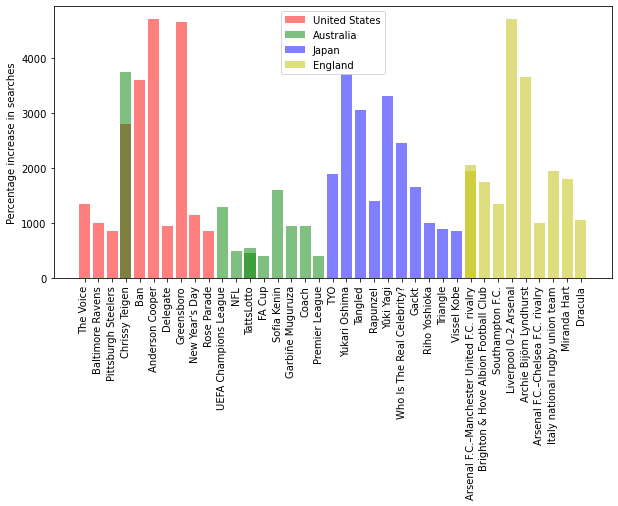

In [9]:
US_NoBreakout_Sorted = US_NoBreakout.sort_values("Month", ascending=False)
AUS_NoBreakout_Sorted = AUS_NoBreakout.sort_values("Month", ascending=False)
JAP_NoBreakout_Sorted = JAP_NoBreakout.sort_values("Month", ascending=False)
ENG_NoBreakout_Sorted = ENG_NoBreakout.sort_values("Month", ascending=False)
plt.figure(figsize=(10,5))
Us = plt.bar(US_NoBreakout_Sorted["Search Term"], US_NoBreakout_Sorted["Percentage"], color='r', alpha=0.5)
Aus = plt.bar(AUS_NoBreakout_Sorted["Search Term"], AUS_NoBreakout_Sorted["Percentage"], color='g', alpha=0.5)
Jap = plt.bar(JAP_NoBreakout_Sorted["Search Term"], JAP_NoBreakout_Sorted["Percentage"], color='b', alpha=0.5)
Eng = plt.bar(ENG_NoBreakout_Sorted["Search Term"], ENG_NoBreakout_Sorted["Percentage"], color='y', alpha=0.5)
plt.legend((Us[0], Aus[0], Jap[0], Eng[0]), ('United States', 'Australia', "Japan", "England"))
plt.xticks(rotation='vertical')
plt.ylabel("Percentage increase in searches")
plt.show()
# print(AUS_NoBreakout)
# print(JAP_NoBreakout)
# print(ENG_NoBreakout)